<a href="https://colab.research.google.com/github/Gnome101/MAT_422/blob/main/Module_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3.1. Necessary and sufficient conditions of local minimizers

## Local Minimizer
A point $x*$ is a local minimizer of a function $f(x)$ if there exists a neighborhood around $x*$ such that $f(x*) \le f(x)$ for all points $x$ in that neighborhood. Its kind of like $x*$ is the point where $f$ achieves a local minimum so all of the points in its region are smaller than it.

## Conditions for A Local Minimizer

### First-Order
For a smooth function if $∇f(x*) = 0$ and the second-order condition is stronger then we have a sufficient condition for a local minimizer.

### Second-Order
The Hessian matrix of the function at the local minimizer is positive or $∇^2f(x*) \ge 0$
### Example 1
Consider $f(x) = x^2$
$f'(x) = 2x$

The criticial points of the function are when
$x = 0$. This validates the first condition of the local minimizer.

Then we know that $f''(x) = 2$ and $2 \ge 0$ therefore it validates the second condition.

Thus, $x* = 0$ is a local minimizer.



In [ ]:
# Our function is x^2 + 4x + 4
def f(x):
    return x**2 + 4*x + 4

# f'(x) = 2x + 4
def first_derivative(x):
    return 2*x + 4

# f''(x) = 2
def second_derivative(x):
    return 2

# Now we have to find the critiical point which is when f'(x) == 0
def find_critical_point():
    for x in range(-10,10):
      if(first_derivative(x) == 0):
        print("Critical Point Found:", x)
        return x

# Verify the second order criteron
def verify_minimum(critical_point):
    # Check if second derivative is positive
    if second_derivative(critical_point) > 0:
        return f(critical_point), "Local minimum"
    else:
        return f(critical_point), "Not a local minimum"

# Find critical point
critical_point = find_critical_point()

# Verify it's a local minimum
function_value, result = verify_minimum(critical_point)

critical_point, function_value, result


Critical Point Found: -2


(-2, 0, 'Local minimum')

# 3.3.2. Convexity and global minimizers

## Convex Set
A set $S \subset R^n$ is convex if for any two points $x_1,x_2 \in S$ the line segment connecting them is in contained wholly in S.

Essentially for all $\lambda \in [0,1]$ then $\lambda X_1 + (1 - \lambda) x_2 \in S$.

## Convex Function
A function $f(x)$ whose domain is a convex xet and for any two points $x_1, x_2 \in Dom(f)$ the following inequality holds

$f(\lambda x_1 + (1 - \lambda)x_2) \le \lambda f(x+1) + (1 - \lambda)f(x_2)$

Thus, the line segment connecting the points $f(x_1)$ and $f(x_2)$ lies above the graph of th efunction. If this inequality holds for all $x_1 \neq x_2$ then the function is strictly convex.

## Properties of Convex Functions

All local minimum are global minimums on a convex function.
This is the result of the function not having any valleys or dips.

If f is twice differentiable then a sufficient condition for f to be convex is that its Hessian Matrix $H_f(x)$ is positive for all x in the domain. Essentially for all vectors, $v \in R^n $ we have $v^TH_f(x)v \ge 0$ for all x.

## Convex Optimization
When minimizing a convex function over a convex set, any local minimum is guaranteed to be a global minimum.

## Global Minimizers
Consider $f(x)$ where the domain of $f$ is $A$.
A global minimizer is a function where point $x* \in A$  such that $f(x*) \le f(x)$ for all $x \in A$

A global minimzer is similar to a local minimizer; however, a local minimizer is the minimum for a set of terms of a domain while the global minimizer is the minimum for a complete domain.


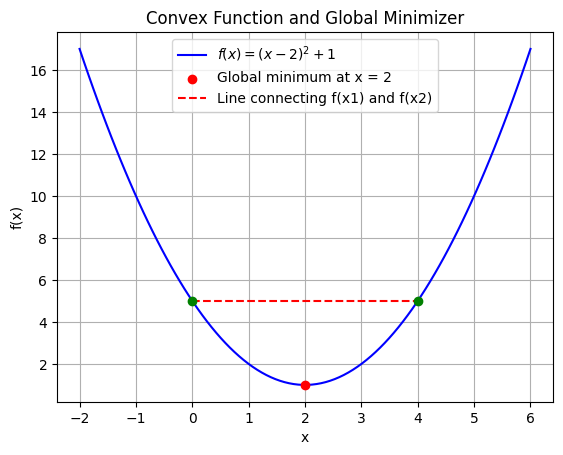

In [4]:
def convex_function(x): # our function is (x-2)^2 + 1
    return (x - 2) ** 2 + 1

x_values = np.linspace(-2, 6, 100)
y_values = convex_function(x_values)

plt.plot(x_values, y_values, label=r'$f(x) = (x - 2)^2 + 1$', color='blue')

global_min = 2
plt.scatter(global_min, convex_function(global_min), color='red', label=f'Global minimum at x = {global_min}', zorder=5)

x1, x2 = 0, 4
y1, y2 = convex_function(x1), convex_function(x2)
plt.plot([x1, x2], [y1, y2], 'r--', label='Line connecting f(x1) and f(x2)')

plt.scatter([x1, x2], [y1, y2], color='green', zorder=5)

plt.title('Convex Function and Global Minimizer')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
# The following code below shows how f(x) is a convex function along
# with what the global minimizer is

# 3.3.3. Gradient descent

Gradient descent is an optimization algorithm used to minimize functions by iteratively moving towards the function's steepest descent or the direction where the function decreases most rapidly.

It is commonly used in machine learning and optimization problems.

The gradient of a function $f(x)$ at point $x$ is denoted as $∇f(x)$ indicates the direction of the steepest ascent. So moving in the opposite directon would decrease the value each step.

Gradient Descent is mostly guaranteed to converge to a global minimum on a convex function.


In [2]:
import numpy as np
def gradient_descent(f, grad_f, x0, learning_rate=0.1, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x

def f(x):
    return x**2 + 4*x + 4

def grad_f(x):
    return 2*x + 4

x0 = np.array([0.0])
minimum = gradient_descent(f, grad_f, x0)
print(minimum)


[-1.99999521]


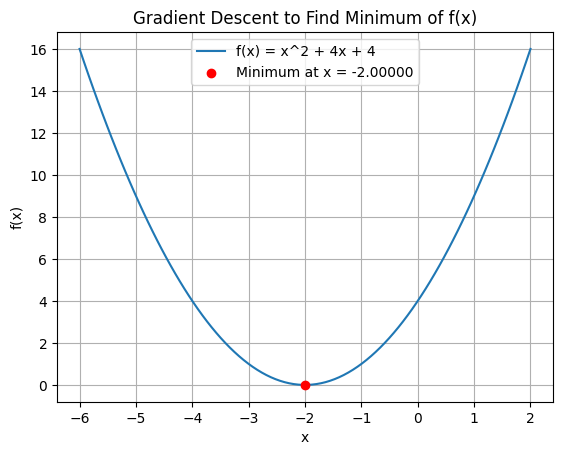

In [3]:
import matplotlib.pyplot as plt

x_values = np.linspace(-6, 2, 100)
y_values = f(x_values)

x0 = np.array([0.0])
minimum = gradient_descent(f, grad_f, x0)

plt.plot(x_values, y_values, label="f(x) = x^2 + 4x + 4")
plt.scatter(minimum, f(minimum), color='red', label=f'Minimum at x = {minimum[0]:.5f}', zorder=5)
plt.title('Gradient Descent to Find Minimum of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
